In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# Load the data
data = pd.read_table('developments_in_high_throughput_sequencing.tsv', sep ='\t')

In [3]:
# Get a list of instruments
instruments = data.Label.unique()

In [4]:
instruments

array(['ABI Sanger 3730xl', '454 GS FLX', '454 GS Junior', 'Illumina GA',
       'Illumina HiSeq 2000/2500', 'Illumina HiSeq 2500 RR',
       'Illumina HiSeq 4000', 'Illumina HiSeq X', 'Illumina NextSeq 500',
       'Illumina MiSeq', 'Illumina MiniSeq', 'SOLiD', 'IonTorrent PGM ',
       'IonTorrent Proton', 'IonTorrent S5/S5XL', 'PacBio RS',
       'Oxford Nanopore MinION Mk1'], dtype=object)

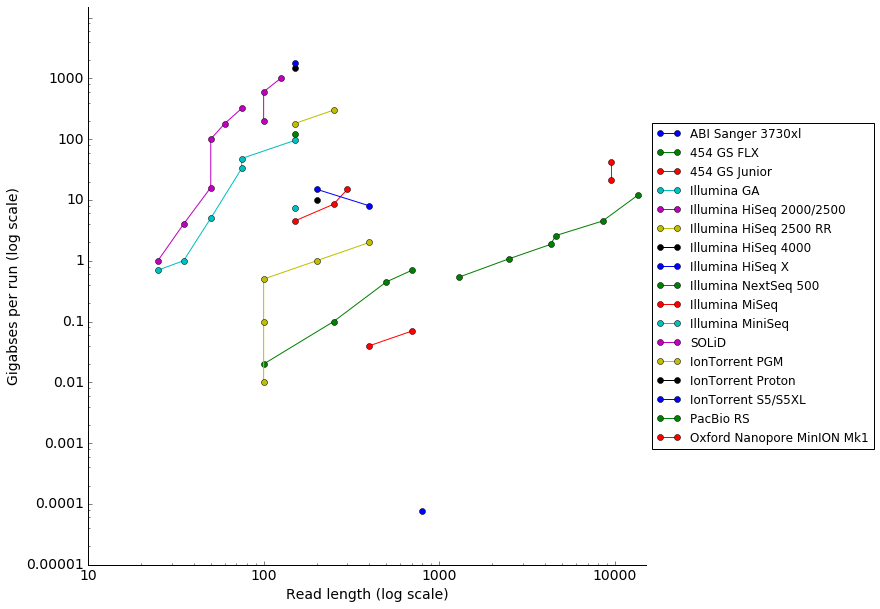

In [11]:
# Set up the plot
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
plt.xlabel('Read length (log scale)', fontsize=14)
plt.ylabel('Gigabses per run (log scale)', fontsize=14)

# Plot the data
for instrument in instruments:
    reads = data[data.Label == instrument]['Read length (mode or average)']
    bases = data[data.Label == instrument]['Bases per run (gigabases)']
    plt.plot(reads, bases, 'o-', label = instrument)

# Set scales, labels
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(10,15000)
plt.ylim(0.00001,15000)
ax.set_xticklabels(['1','10','100','1000','10000','100000'], fontsize=14) # Need to expand list to show the one I want
ax.set_yticklabels(['0.000001','0.00001','0.0001','0.001','0.01','0.1','1','10','100','1000'], fontsize=14)

# Adjust border, remove right and top
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Prepare legend box OUTSIDE of plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# finish
plt.savefig('developments_in_high_throughput_sequencing_bare.pdf', orientation='landscape')
plt.show()